# Критерии успешности компьютерных игр

Есть исторические данные о продажах игр во всех регионах мира, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить критерии, определяющие успешность игры, а также выбрать перспективную платформу для дальнеших маркетинговых операций интернет-магазина компьютерных игр. 
Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й.

# Шаг 1. Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12988,Countdown: The Game,Wii,2009.0,Puzzle,0.00,0.05,0.00,0.00,NaN,NaN,NaN
8641,Left Brain Right Brain: Use Both Hands Train B...,DS,2007.0,Misc,0.15,0.00,0.00,0.01,NaN,NaN,NaN
14601,R-Type III: The Third Lightning,GBA,2004.0,Shooter,0.02,0.01,0.00,0.00,46.0,tbd,E
6878,Zumba Fitness: World Party,XOne,2013.0,Misc,0.17,0.05,0.00,0.02,73.0,6.2,E
14811,XBLAZE Code: Embryo,PSV,2013.0,Adventure,0.01,0.00,0.01,0.00,43.0,7.4,M
11084,"Saiyuuki: Kinkaku, Ginkaku no Inbou",DS,2007.0,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,NaN
8209,The Wild Thornberrys: Animal Adventures,PS,2000.0,Adventure,0.10,0.07,0.00,0.01,NaN,NaN,NaN
11608,Bleach: Heat the Soul 4,PSP,2007.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
9368,Haunted House,Wii,2010.0,Action,0.12,0.00,0.00,0.01,41.0,tbd,E10+
12079,Billy's Boot Camp: Wii de Enjoy Diet!,Wii,2011.0,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN


Видим, что есть пропуски в скоринге, а также не числовые значения. 

# Шаг 2. Подготовка данных

Приведем названия столбцов к нижнему регистру.

In [4]:
df.columns = map(str.lower, df.columns)
df.sample(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3930,River Raid II,2600,1988.0,Shooter,0.47,0.03,0.00,0.01,NaN,NaN,NaN
12670,BlazBlue Central Fiction,PS3,2016.0,Fighting,0.02,0.02,0.02,0.01,NaN,tbd,T


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Есть пропуски в колонке с именами и жанрами (ничтожно мало), чуть больше процентра в колонке с годом выпуска, почти половина пропусков в колонках с рейтингами. 

### Name

In [7]:
df['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [8]:
df['name'].isna().sum()

2

In [9]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посмотрим, можем ли мы найти потеряные имена (вдруг)

In [10]:
df.loc[(df['platform']=='GEN')&(df['year_of_release']==1993)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Нет, ни с чем пропуски не получилось сопоставить. Возможная причина пропусков - какой-то сбой выгрузки или склеивании данных из разных таблиц. Таких значений только 2 из 16713, так что предлагаю эти две строки просто удалить. 

In [11]:
df.dropna(subset =['name'],inplace=True)
df['name'].isna().sum()

0

Приведем тип колонки с именем к типу строки.

In [12]:
df['name']=df['name'].astype('str')

In [13]:
df['name'].value_counts()

Need for Speed: Most Wanted    12
Madden NFL 07                   9
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
                               ..
SD Gundam G Generation Zero     1
Paperboy / Rampage              1
Goodbye Deponia                 1
Opoona                          1
Pocket Monsters Stadium         1
Name: name, Length: 11559, dtype: int64

In [14]:
df.loc[df['name']=='Need for Speed: Most Wanted'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Приведем названия игр к нижнему регистру, чтобы посмотреть, нет ли дубликатов. 

In [15]:
df['name_low']=df['name'].str.lower()
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low
10916,Uta no Prince-Sama: Debut,PSP,2012.0,Adventure,0.00,0.00,0.09,0.0,NaN,NaN,NaN,uta no prince-sama: debut
14541,Graffiti Kingdom,PS2,2004.0,Role-Playing,0.01,0.01,0.00,0.0,71.0,7.1,E,graffiti kingdom
16394,Surf's Up,GC,2007.0,Sports,0.01,0.00,0.00,0.0,NaN,tbd,E10+,surf's up


In [16]:
df['name_low'].value_counts()

need for speed: most wanted                12
lego marvel super heroes                    9
ratatouille                                 9
madden nfl 07                               9
fifa 14                                     9
                                           ..
touchmaster                                 1
d.c. ii p.s.: da capo ii plus situation     1
tom clancy's splinter cell: essentials      1
martian gothic: unification                 1
one piece: unlimited adventure              1
Name: name_low, Length: 11559, dtype: int64

Количество уникальных значений для имен не поменялось. 

In [17]:
df.duplicated().sum()

0

### Platform

In [18]:
df['platform'].describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [19]:
df['platform'].isna().sum()

0

Пропусков нет.

In [20]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Приведем знаечния в этой колонке к типу строки (хотя в данном проекте это некритично).  

In [21]:
df['platform']=df['platform'].astype('str')

In [22]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low
13153,Hercules: The Legendary Journeys,N64,2000.0,Role-Playing,0.04,0.01,0.0,0.0,NaN,NaN,NaN,hercules: the legendary journeys


### Year of release

In [23]:
df['year_of_release'].isna().sum()

269

In [24]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
name_low           0.000000
dtype: float64

1% строк с пропуском года выпуска, предлагаю удалить.

In [25]:
df.dropna(subset =['year_of_release'],inplace=True)
df['year_of_release'].isna().sum()

0

In [26]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
name_low           0.000000
dtype: float64

In [27]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,wii sports
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super mario bros.
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,mario kart wii
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,wii sports resort
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon red/pokemon blue
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,samurai warriors: sanada maru
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,lma manager 2007
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,haitaka no psychedelica
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,spirits & spells


Поменяем тип данных на дату для правильного подсчета в будущих сводных таблицах и графиках. 

In [28]:
df['year_of_release']=pd.to_datetime(df['year_of_release'],format='%Y') #получаем дату
df['year_of_release']=pd.DatetimeIndex(df['year_of_release']).year #выделяем только год
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low
82,GoldenEye 007,N64,1997,Shooter,5.80,2.01,0.13,0.15,NaN,NaN,NaN,goldeneye 007
8883,Battleborn,XOne,2016,Shooter,0.10,0.04,0.00,0.01,71.0,7.2,T,battleborn
2243,007: The World is not Enough,PS,2000,Action,0.51,0.35,0.00,0.06,61.0,6.7,T,007: the world is not enough


### Genre

In [29]:
df['genre'].describe()

count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object

In [30]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [31]:
df['genre'].isna().sum()

0

Пропусков нет. С текстом обработка не нужна, можно оставить текущий тип данных. 

### Sales

In [32]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low
98,Super Mario Bros. 2,NES,1988,Platform,5.39,1.18,0.7,0.19,NaN,NaN,NaN,super mario bros. 2


Объединим колонки по продажам, чтобы посмотреть на них в одном выводе. 

In [33]:
sales_cols = df.columns[df.columns.str.contains('sales')]
sales_cols

Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], dtype='object')

In [34]:
df[sales_cols].head()

,na_sales,eu_sales,jp_sales,other_sales
0,41.36,28.96,3.77,8.45
1,29.08,3.58,6.81,0.77
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
4,11.27,8.89,10.22,1.00


In [35]:
df[sales_cols].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [36]:
df[sales_cols].isna().sum()

na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
dtype: int64

Пропусков нет. Округим значения для удобства восприятия. 

In [37]:
df[sales_cols]=df[sales_cols].round(2)
df[sales_cols].head()

,na_sales,eu_sales,jp_sales,other_sales
0,41.36,28.96,3.77,8.45
1,29.08,3.58,6.81,0.77
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
4,11.27,8.89,10.22,1.00


Довавим колонку с суммарными доходами от продаж. 

In [38]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low
8188,NHL 2004,XB,2003,Sports,0.13,0.04,0.0,0.01,85.0,6.5,E,nhl 2004


In [39]:
df['total_s']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
11263,Mystery Stories: Curse of the Ancient Spirits,DS,2011,Adventure,0.04,0.04,0.0,0.01,NaN,tbd,E10+,mystery stories: curse of the ancient spirits,0.09


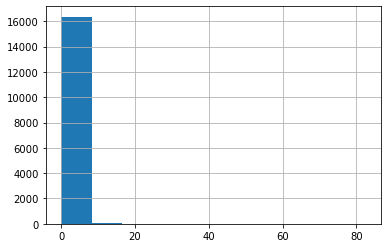

In [40]:
df['total_s'].hist()
plt.show()

In [41]:
df['total_s'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_s, dtype: float64

75% всех игр напродавалось не больше чем на 470 тыс. В последнем квартиле разброс чудовищно большой, до 40 млн.

### Raiting

#### Critic score

In [42]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
4948,Airlock,2600,1981,Action,0.36,0.02,0.0,0.0,NaN,NaN,NaN,airlock,0.38


In [43]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [44]:
df['critic_score'].isna().mean()

0.5145341765993675

Больше половины строк с пропущенной оценкой критиков.

In [45]:
df.loc[df['critic_score'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
15904,LEGO Star Wars: The Video Game,PC,2005,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN,lego star wars: the video game,0.01
14352,Elf Bowling 1 & 2,GBA,2005,Sports,0.02,0.01,0.00,0.0,NaN,NaN,NaN,elf bowling 1 & 2,0.03
15482,TalkMan,PSP,2006,Misc,0.00,0.00,0.02,0.0,NaN,NaN,NaN,talkman,0.02
14043,Nobunaga's Ambition II,3DS,2015,Strategy,0.00,0.00,0.04,0.0,NaN,NaN,NaN,nobunaga's ambition ii,0.04
8306,Tokyo Xtreme Racer,DC,1999,Racing,0.00,0.00,0.17,0.0,NaN,NaN,NaN,tokyo xtreme racer,0.17


In [46]:
df.loc[df['name']=='Nintendogs']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,nintendogs,24.67


Невозможно выделить какую-то особую категорию, по которой можно было бы выявить среднее или медианное значение скора и заменить пропуски, замена медианой по всем данным сильно смещает распределение, также нельзя поставить какое-то рандомное числовое значение, которое будет искажать результаты.  Если заменить пропуски на 'unknown', тип данных в колонке станет смешанным и нельзя будет построить графики. Согласно заданию, мы не будем группировать данные по оценке (в таком случае, строки с пропусками в этой колонке просто не войдут в группировку). 
Поэтому предлагаю оставить пропуски. 

#### User score

In [47]:
df['user_score'].isna().mean()

0.4016662612503041

40 % пользовательских оценок пропущенно. 

In [48]:
df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [49]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [50]:
df.loc[df['user_score']=='tbd'].count()

name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2326
name_low           2376
total_s            2376
dtype: int64

tbd - to be described or decided. Оценка неизвестна, и сопоставить её пока не с чем. Строк с таким значением сейчас 2,3 тыс. Из-за этого значения весь столбец получает смешанный тип, поэтому его невозможно использовать для построения графиков. Я предлагаю считать такие значения как пропуски. 

In [51]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df.loc[df['user_score']=='tbd'].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
name_low           0
total_s            0
dtype: int64

Приведем столбец к числовому значению. 

In [52]:
df['user_score']=df['user_score'].astype('float64')

In [53]:
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

#### Rating ESRB

In [54]:
df['rating'].isna().mean()

0.40598394551204087

40% строк с незаполненным рейтингом ESRB

In [55]:
df['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [56]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [57]:
df.loc[df['rating']=='RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP,supreme ruler: cold war,0.04


In [58]:
df.loc[df['rating'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
9466,Zoobles! Spring to Life!,DS,2011,Misc,0.10,0.02,0.00,0.01,NaN,NaN,NaN,zoobles! spring to life!,0.13
16294,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,adventure time: the secret of the nameless,0.01
5852,Cart World Series,PS,1997,Racing,0.17,0.11,0.00,0.02,NaN,NaN,NaN,cart world series,0.30
9661,Capcom vs. SNK 2: Millionaire Fighting 2001,DC,2001,Fighting,0.00,0.00,0.12,0.00,NaN,NaN,NaN,capcom vs. snk 2: millionaire fighting 2001,0.12
10522,The King of Fighters: Dream Match 1999,DC,1999,Fighting,0.00,0.00,0.10,0.00,NaN,NaN,NaN,the king of fighters: dream match 1999,0.10


Значения в этом столбике не числовые, а категориальные поэтому стоит применить метод loc для замены значений. Согласно классификации ESRB, "RP" значит «Rating Pending», т.е. «Рейтинг ожидается». Вполне подходит для замены пропусков. 

In [59]:
df.loc[df['rating'].isna(), 'rating'] = 'RP'
df['rating'].isna().sum()

0

# Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. 

In [60]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

У нас данные за период с 1980 по 2016 год.

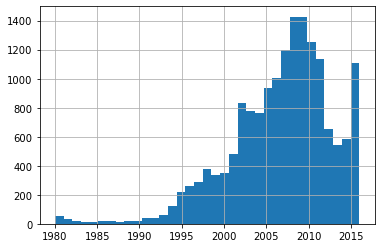

In [61]:
df['year_of_release'].hist(bins=35)
plt.show()

Вывод: Особых аномалий в распредении не наблюдается, но видим, что количество новых игр росло до 2010 года. До 1990 года выходило не больше 50 игр в год, потом шёл крутой рост, так что пик составлял более 1400 новых игр к 2010 году, а потом был провал до 2015, или просто не все игры за последние годы попали в выборку. Предлагаю пока дальнейшние подсчеты по продажам считать за период с 2000 года, потому что кол-во новых игр в этом периоде более-менее сопоставимо.

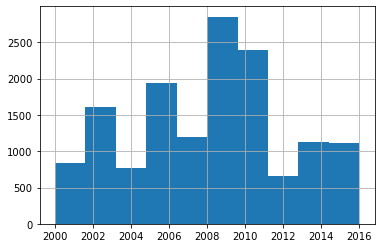

In [62]:
df=df.query('year_of_release >= 2000')
df['year_of_release'].hist()
plt.show()

### Посмотрим, как менялись продажи по платформам: выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Решим, за какой характерный срок появляются и исчезают  платформы

In [63]:
df.pivot_table(index='platform', values='total_s', aggfunc='sum').sort_values(by='total_s',ascending=False).head(10)

,total_s
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


Выделим топ 5 платформ по продажам PS2, X360, PS3, Wii, DS, так как у них сильный разрыв с остальными. 

In [64]:
top_platform = df.query('platform in("PS2", "X360", "PS3", "Wii", "DS")')
top_platform.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
8479,ESPN College Hoops,PS2,2003,Sports,0.08,0.06,0.00,0.02,83.0,8.5,E,espn college hoops,0.16
14734,Ganbare Goemon: Toukai Douchuu Ooedo Tenguriga...,DS,2005,Action,0.00,0.00,0.03,0.00,NaN,NaN,RP,ganbare goemon: toukai douchuu ooedo tenguriga...,0.03
16070,Scared Rider Xechs,PS2,2010,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,RP,scared rider xechs,0.02
11066,Spectral Force Genesis,DS,2008,Role-Playing,0.08,0.00,0.01,0.01,46.0,7.0,T,spectral force genesis,0.10
10305,Astro Boy: The Video Game,Wii,2009,Action,0.10,0.00,0.00,0.01,48.0,3.5,E10+,astro boy: the video game,0.11


Посмотрим распределние суммарных продаж топ-продаваемых платформ. 

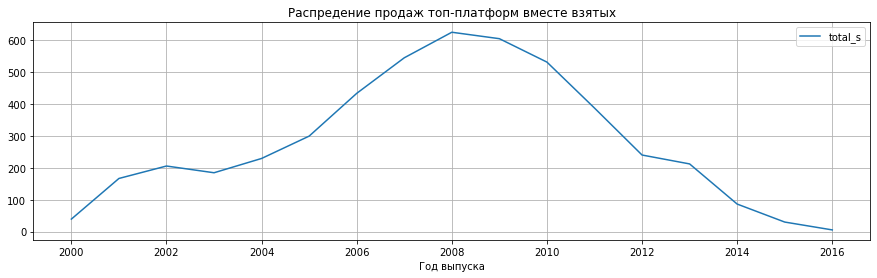

In [65]:
top_5_sales = top_platform.pivot_table(index='year_of_release', values='total_s', aggfunc='sum')
top_5_sales.plot(grid=True,figsize=(15,4))
plt.xlabel('Год выпуска')
plt.title('Распредение продаж топ-платформ вместе взятых')
plt.show()

Мы видим, что у топ-самых продаваемых платформ пик продаж приходился на 2008-2009 годы.

Посмотрим на распределение по топ-платформам.

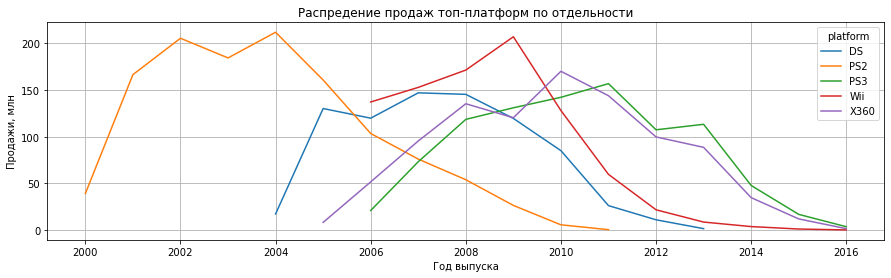

In [66]:
fig, ax=plt.subplots(figsize=(15,4))
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
pd.pivot_table(df.query('platform.isin(@top_platforms)', engine='python'),
               index='year_of_release',
               columns='platform',
               values='total_s',
               aggfunc='sum').plot(ax=ax)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн')
plt.title('Распредение продаж топ-платформ по отдельности')
plt.grid(True)
plt.xlim
plt.show()

Вывод: По этим графикам мы видим, что каждая из платформ имеет свой пик, а потом сходит на нет и имеет длинный хвост, т.е. цикл жизни платформы состалвяет примерно **8 лет**. Поэтому предлагаю взять половину цикла жизни платформы, данные с 2012 года.

In [67]:
df8=df.query('year_of_release >= 2012')
df8['platform'].describe()

count     2886
unique      11
top        PS3
freq       493
Name: platform, dtype: object

Из 31 платформы остались только 11.

Теперь выделим топ 5 платформ за последние 4 года

In [68]:
df8.pivot_table(index='platform', values='total_s', aggfunc='sum').sort_values(by='total_s',ascending=False).head(10)

,total_s
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [69]:
top_platform = df.query('platform in("PS4", "X360", "PS3", "3DS", "XOne")')

### Посмотрим, какие платформы лидируют по продажам, растут или падают, выберем несколько потенциально прибыльных платформ.

In [70]:
df8.pivot_table(index='platform', values='total_s', aggfunc='sum').sort_values(by='total_s',ascending=False)

,total_s
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


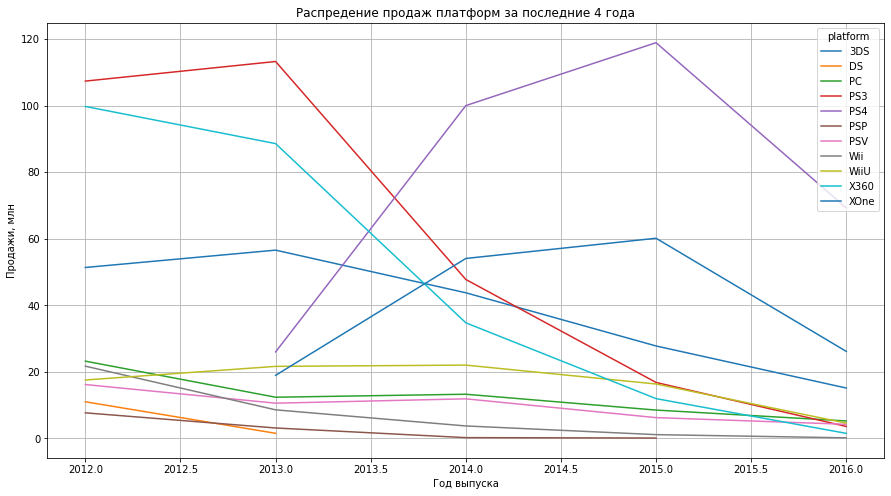

In [71]:
fig, ax=plt.subplots(figsize=(15,8))
pd.pivot_table(df8,
               index='year_of_release',
               columns='platform',
               values='total_s',
               aggfunc='sum').plot(ax=ax)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн')
plt.title('Распредение продаж платформ за последние 4 года')
plt.grid(True)
plt.xlim
plt.show()

Если учесть, что у нас могут не быть полных данных за последний год (с начала 2015), приглядимся к отрезку за два года до этого (с 2013 до 2015): в то время, как у большинства платформ снижаются продажи или остаются на том же уровне, **у двух платформ наблюдается рост: XOne и PS4**. Можем предположить, что они всё ещё не достигли своего пика: они возникли 3 года назад, значит ещё год или два могут расти (раз мы предполагаем, что среднее время жизни 8 лет и пик приходится на середину). 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

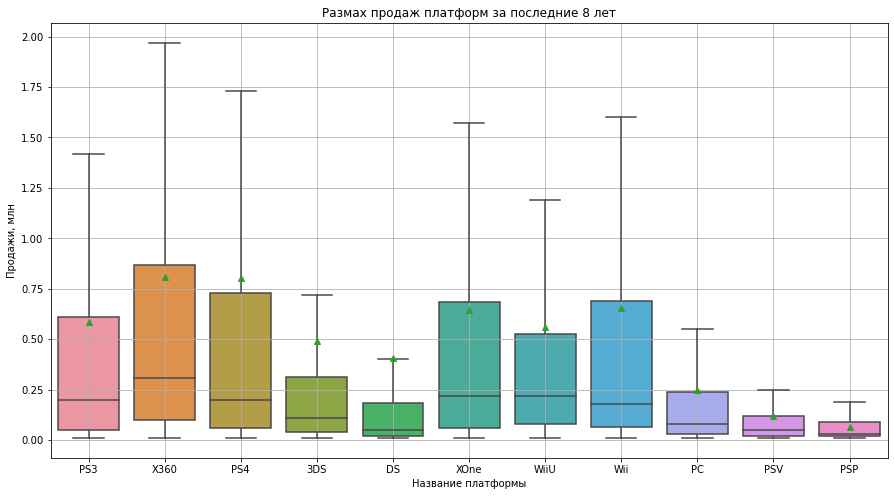

In [72]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='platform',y='total_s',data=df8,showfliers=False, showmeans=True)
plt.grid(True)
plt.xlabel('Название платформы')
plt.ylabel('Продажи, млн')
plt.title('Размах продаж платформ за последние 8 лет')
plt.show()

Вывод: Судить только по сумме продаж не всегда имеет смысл, потому что они стартуют в разное время.  
Если судить по медиане продаж, то наиболее успешными по продажам были X360, потом идут XOne и WiiU в выборке за послледние 4 года. 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

### Корреляция продаж с оценкой критиков

Посмотрим взаимосвязь для платформы X360.

In [73]:
x360=df8.query('platform =="X360"')

In [74]:
x360_critic_corr=x360['total_s'].corr(x360['critic_score'])
x360_critic_corr

0.36057348885073365

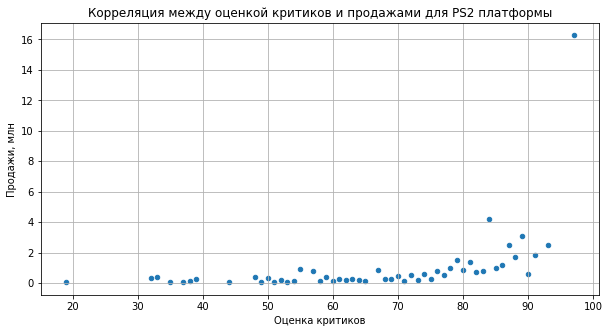

In [75]:
x360_critic_corr_data=x360.pivot_table(index='critic_score', 
                values ='total_s', aggfunc='median').reset_index()
x360_critic_corr_data.plot(x='critic_score',y='total_s', kind='scatter',figsize=(10,5))    
plt.grid(True)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
plt.title('Корреляция между оценкой критиков и продажами для PS2 платформы')
plt.show()

Видим, что для игр с оценкой критиков больше 70, продажи растут и довольно сильно с увеличением рейтинга. 

Соотнесем выводы с продажами игр на других платформах.

In [76]:
critic_corr=df8['total_s'].corr(df8['critic_score'])
critic_corr

0.30819674592077767

Корреляция между продажами и оценкой критиков слабая или нелинейная, если судить только по индексу корреляции. Посмотрим теперь на диаграмму рессеяния. 

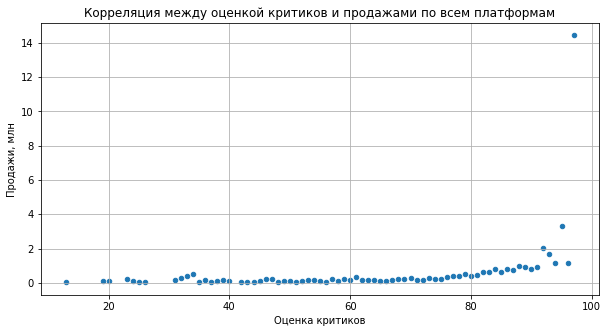

In [77]:
critic_corr_data=df8.pivot_table(index='critic_score', 
                values ='total_s', aggfunc='median').reset_index()
critic_corr_data.plot(x='critic_score',y='total_s', kind='scatter',figsize=(10,5))    
plt.grid(True)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
plt.title('Корреляция между оценкой критиков и продажами по всем платформам')
plt.show()

Вывод: На диаграмме мы видим взаимосвязь между продажами и оценкой критиков, если смотреть на оценки выше 80 баллов: чем больше оценка, тем выше продажи. Тут вывод совпадает с оценкой по одной популярной платформе.


### Корреляция между пользовательской оценкой и продажами

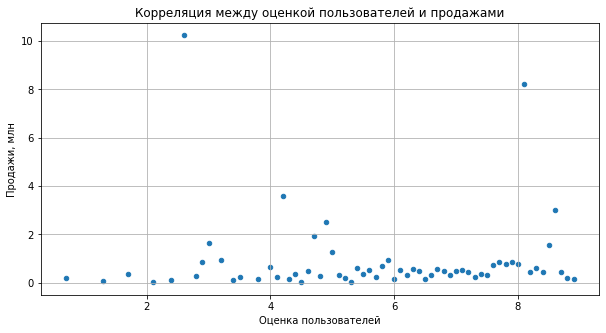

In [78]:
x360_user_corr_data=x360.pivot_table(index='user_score', 
                values ='total_s', aggfunc='median').reset_index()
x360_user_corr_data.plot(x='user_score',y='total_s', kind='scatter',figsize=(10,5))    
plt.grid(True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.title('Корреляция между оценкой пользователей и продажами')
plt.show()

In [79]:
x360_user_corr=x360['total_s'].corr(x360['user_score'])
x360_user_corr

0.0061639786462133256

Что касается пользовательской оценки, то тут связи прослеживается хуже, индекс указывает на слабую корреляцию, на диаграмме есть всплески для 3, 5 и 9 баллов. 

Соотнесем выводы с продажами игр на других платформах.

In [80]:
user_corr=df8['total_s'].corr(df8['user_score'])
user_corr

0.0044288176754932575

Снова видим, что индекс корреляции указывает либо на слабую, либо на нелинейную корреляцию. Посмотрим диаграмму рассеяния. 

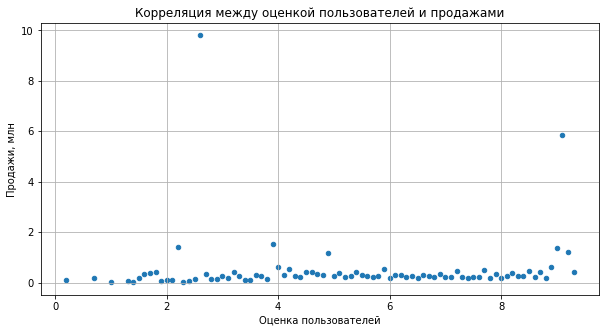

In [81]:
user_corr_data=df8.pivot_table(index='user_score', 
                values ='total_s', aggfunc='median').reset_index()
user_corr_data.plot(x='user_score',y='total_s', kind='scatter',figsize=(10,5))    
plt.grid(True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.title('Корреляция между оценкой пользователей и продажами')
plt.show()

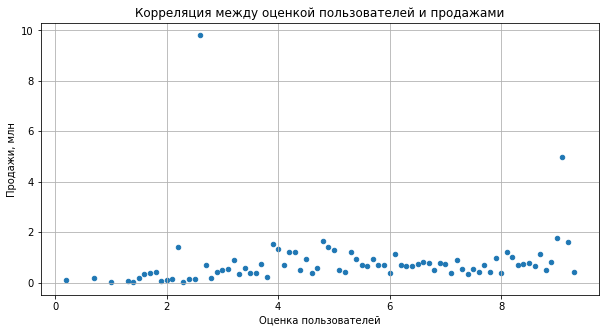

In [82]:
user_corr_data=df8.pivot_table(index='user_score', 
                values ='total_s').reset_index()
user_corr_data.plot(x='user_score',y='total_s', kind='scatter',figsize=(10,5))    
plt.grid(True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.title('Корреляция между оценкой пользователей и продажами')
plt.show()

Вывод: Взаимосвязь между пользовательской оценкой и продажами проследить трудно, однако всё-таки наблюдается для оценок 9 и больше баллов: в таком случае продажи действительно больше. Т.е. если оценивать не одну, а все платформы, то небольшая корреляция всё-таки есть для максимальных баллов пользовательского рейтинга. 

### Посмотрим на общее распределение игр по жанрам, узнаем, какие жанры самые прибыльные, а какие наименнее прибыльные. 

За весь период: 

In [83]:
df.pivot_table(index='genre',values='total_s', aggfunc='mean').sort_values(by='total_s',ascending=False)

,total_s
genre,
Shooter,0.808415
Platform,0.686694
Sports,0.571460
Role-Playing,0.562477
Racing,0.542087
Action,0.495667
Fighting,0.487344
Misc,0.449812
Simulation,0.436732


За последние 4 года

Суммарный доход жанров: 

In [84]:
df8.pivot_table(index='genre',values='total_s', aggfunc='sum').sort_values(by='total_s',ascending=False)

,total_s
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Средние и медианные доходы жанров

In [85]:
df8.pivot_table(index='genre',values='total_s', aggfunc='mean').sort_values(by='total_s',ascending=False)

,total_s
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


In [86]:
df8.pivot_table(index='genre',values='total_s', aggfunc='median').sort_values(by='total_s',ascending=False)

,total_s
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Посмотрим на диаграмму по среднему доходу жанров. 

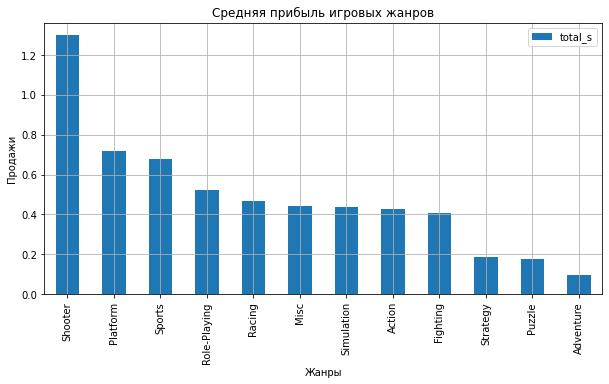

In [87]:
df8.pivot_table(index='genre',
                values='total_s', 
                aggfunc='mean').sort_values(by='total_s'
                                           ,ascending=False).plot(kind='bar',figsize=(10,5),grid=True)    
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Средняя прибыль игровых жанров')
plt.show()

In [88]:
top_genre=df8.query('genre in("Platform", "Shooter", "Sports", "Role-Playing", "Racing")')
top_genre.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s
1399,Bravely Default: Flying Fairy,3DS,2012,Role-Playing,0.50,0.32,0.49,0.08,NaN,NaN,RP,bravely default: flying fairy,1.39
4194,Inazuma Eleven Go 2: Chrono Stone,3DS,2012,Role-Playing,0.00,0.01,0.46,0.00,NaN,NaN,RP,inazuma eleven go 2: chrono stone,0.47
11771,Lost Dimension,PS3,2014,Role-Playing,0.05,0.01,0.00,0.01,71.0,7.3,T,lost dimension,0.07
2895,SSX,X360,2012,Sports,0.38,0.26,0.00,0.06,82.0,6.4,E,ssx,0.70
8645,Ar Nosurge: Ode to an Unborn Star,PS3,2014,Role-Playing,0.05,0.03,0.06,0.02,67.0,7.8,T,ar nosurge: ode to an unborn star,0.16


Если смотреть на продажи суммарно, то лидирует игры жанра action. Но, так как игр разных жанров не одинаковое количество, мы сравнили их среднее и получили такие результаты: 

**Топ 5 прибыльных жанров**: shooter, platform, sports, role-playing и racing.

**Наименнее прибыльные жанры**: fighting, action, adventure, strategy и puzzle. 

# Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    Самые популярные жанры (топ-5). 
    Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

### Распределение по регионам для топ-платформ

Возьмем данные для топ-5 популярных платформ за последние 4 года. 

In [89]:
top_platform=top_platform.query('year_of_release >= 2012')
top_platform['part_na']=top_platform['na_sales']/top_platform['total_s']
top_platform['part_eu']=top_platform['eu_sales']/top_platform['total_s']
top_platform['part_jp']=top_platform['jp_sales']/top_platform['total_s']
top_platform['part_other']=top_platform['other_sales']/top_platform['total_s']
top_platform.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_low,total_s,part_na,part_eu,part_jp,part_other
12185,Brothers in Arms: Furious 4,PS3,2012,Shooter,0.01,0.05,0.00,0.01,NaN,NaN,M,brothers in arms: furious 4,0.07,0.142857,0.714286,0.000000,0.142857
422,Halo: The Master Chief Collection,XOne,2014,Shooter,1.91,1.00,0.03,0.29,85.0,7.2,M,halo: the master chief collection,3.23,0.591331,0.309598,0.009288,0.089783
5918,Fist of the North Star: Ken's Rage 2,PS3,2012,Fighting,0.00,0.00,0.30,0.00,49.0,7.0,M,fist of the north star: ken's rage 2,0.30,0.000000,0.000000,1.000000,0.000000
1302,Dragon Quest VII: Warriors of Eden,3DS,2013,Role-Playing,0.06,0.09,1.30,0.01,NaN,NaN,RP,dragon quest vii: warriors of eden,1.46,0.041096,0.061644,0.890411,0.006849
8844,Pro Baseball Spirits 2015,PS3,2015,Action,0.00,0.00,0.15,0.00,NaN,NaN,RP,pro baseball spirits 2015,0.15,0.000000,0.000000,1.000000,0.000000


Посмотрим распредение между регионами для каждой топ-платформы.

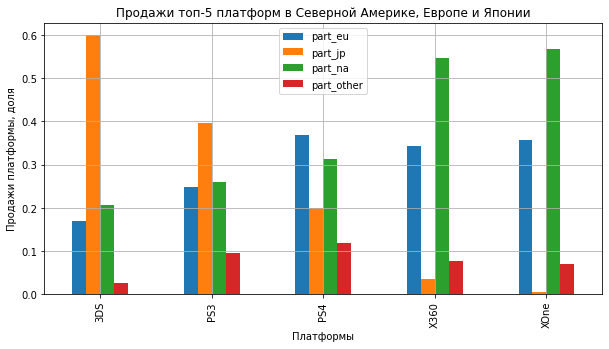

In [90]:
region_part=['part_na','part_eu','part_jp','part_other']
report=top_platform.pivot_table(index='platform', values=region_part)
report.plot(kind='bar',figsize=(10,5),grid=True)    
plt.xlabel('Платформы')
plt.ylabel('Продажи платформы, доля')
plt.title('Продажи топ-5 платформ в Северной Америке, Европе и Японии')
plt.show()

Посмотрим также на диаграммы с абсолютными значениями продаж по всем топ-платформе и регионам, так как разные платформы приносят разные суммы доходов. 

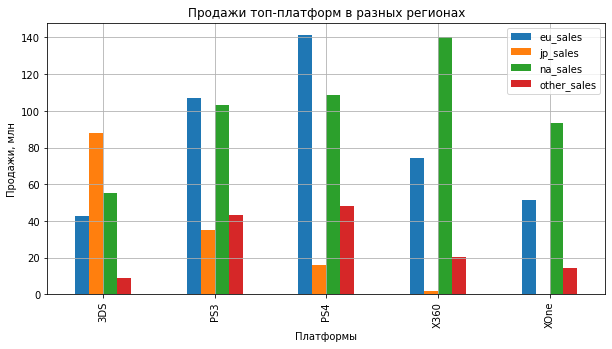

In [91]:
top_platform.pivot_table(index='platform', 
                             values={'na_sales','eu_sales','jp_sales','other_sales'},
                             aggfunc='sum').plot(kind='bar',
                                                 figsize=(10,5),
                                                 grid=True)

plt.xlabel('Платформы')
plt.ylabel('Продажи, млн')
plt.title('Продажи топ-платформ в разных регионах')
plt.show()

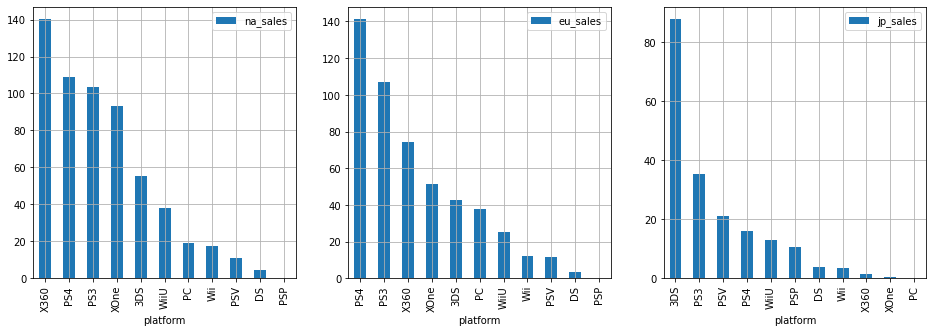

In [92]:
plt.subplots(figsize=(16,5))
regions=['na_sales','eu_sales','jp_sales']
num_cols=len(regions)
num_rows=1
for i, region in enumerate(regions):
    (df8.pivot_table(index='platform',values=region, aggfunc='sum')
    .sort_values(by=region,ascending=False)
    .plot(ax =plt.subplot(num_rows,num_cols,i+1),grid=True, kind='bar')
    )
plt.show()

В регионах суммарные продажи за последние 4 года распределились по платформам в таком порядке: 

Северная Америка: X360, PS4, PS3, Xone и 3DS.

Европа: PS4, PS3, X360, Xone, 3DS

Япония: 3DS, PS3, PSV, PS4, WiiU

### Распределение по регионам для топ-5 жанров

In [93]:
columns=['na_sales','eu_sales','jp_sales','other_sales']
genre_report=top_genre.pivot_table(index='genre', 
                             values=columns,
                             aggfunc='sum')
genre_report

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Platform,21.41,8.63,25.38,5.58
Racing,27.29,2.50,17.22,6.49
Role-Playing,48.53,65.44,64.00,14.83
Shooter,113.47,9.23,144.77,37.26
Sports,69.09,8.01,81.53,22.44


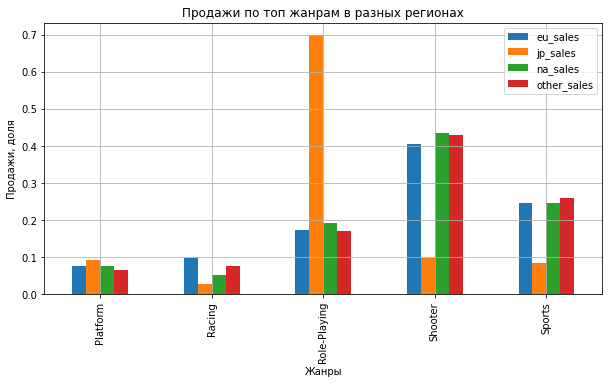

In [94]:
for col in columns:
    genre_report[col]=genre_report[col]/genre_report[col].sum()
genre_report.plot(kind='bar',figsize=(10,5),grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи, доля')
plt.title('Продажи по топ жанрам в разных регионах')
plt.show()

- Action и неклассифицированные игры: одинаково популярны во всех регионах.
- Role playing особенно популярен в Японии, и там же меньше всего любят игры про спорт и войнушки. 

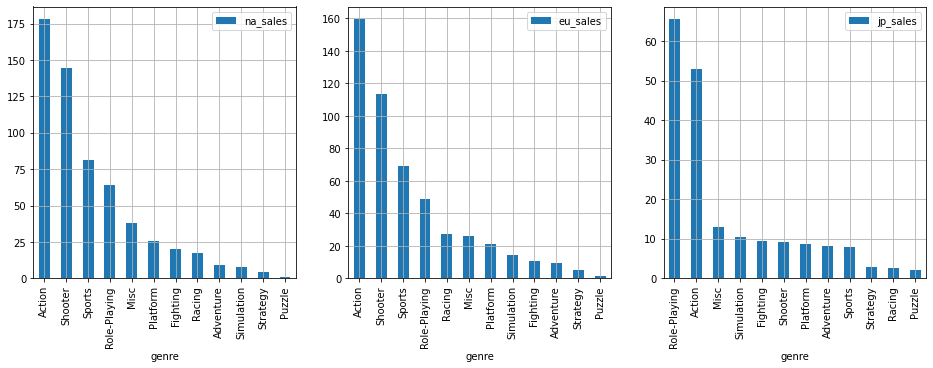

In [95]:
plt.subplots(figsize=(16,5))
regions=['na_sales','eu_sales','jp_sales']
num_cols=len(regions)
num_rows=1
for i, region in enumerate(regions):
    (df8.pivot_table(index='genre',values=region, aggfunc='sum')
    .sort_values(by=region,ascending=False)
    .plot(ax =plt.subplot(num_rows,num_cols,i+1),grid=True, kind='bar')
    )
plt.show()

Топ-5 жанров в регионах:

Северная Америка: Action, Shooter, Sports, Role-Playing и Misc

Европа: Action, Shooter, Sports, Role-Playing и Racing

Япония: Role-Playing, Action, Simulations, Misc, Fighting. Первые два - с больним отрывом от остальных. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [96]:
rating_report=df8.pivot_table(index='rating', 
                             values=columns,
                             aggfunc='sum')
rating_report_t = rating_report.T # перевернем таблицу, чтобы сфокусироваться на регионах, а не на рейтинге
rating_report_t

rating,E,E10+,M,RP,T
eu_sales,113.03,55.37,193.96,91.50,52.96
jp_sales,28.33,8.19,21.20,108.84,26.02
na_sales,114.37,75.70,231.57,103.31,66.02
other_sales,31.44,16.23,63.38,27.17,17.94


Посмотрим распределение по рейтингу с разбивгой по регионам. 

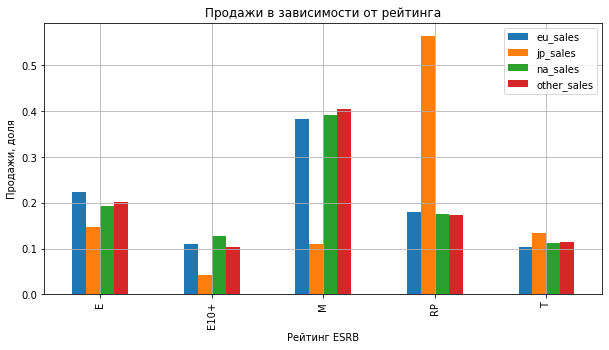

In [97]:
for col in columns:
    rating_report[col]=rating_report[col]/rating_report[col].sum()
rating_report.plot(kind='bar',figsize=(10,5),grid=True)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, доля')
plt.title('Продажи в зависимости от рейтинга')
plt.show()

Теперь разбивка по регионам, абсолютные значения: 

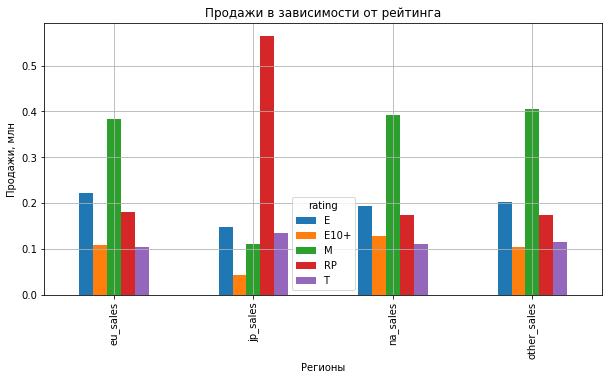

In [98]:
rating_report_t.plot(kind='bar',figsize=(10,5),grid=True)
plt.xlabel('Регионы')
plt.ylabel('Продажи, млн')
plt.title('Продажи в зависимости от рейтинга')
plt.show()

Теперь разбивка по регионам, доля: 

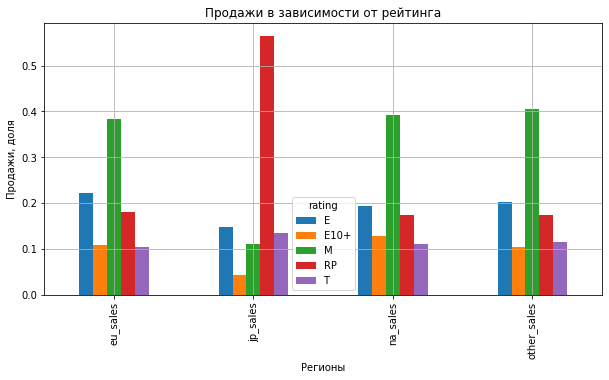

In [99]:
for col in columns:
    rating_report[col]=rating_report[col]/rating_report[col].sum()
rating_report_t.plot(kind='bar',figsize=(10,5),grid=True)
plt.xlabel('Регионы')
plt.ylabel('Продажи, доля')
plt.title('Продажи в зависимости от рейтинга')
plt.show()

- В Японии самая большая доля продаж игр с неопределенным рейтингом (RP, он неизвестен или ждет оценки). 
- Во всем мире, кроме Японии, больше покупаются игры с рейтингов М, Mature, т.е. игры для взрослых с достаточно высоким уровнем насилия. 
- Детские и подростковые игры с пометками Е, Е10+ и T примерно одинаково продаются в разных регионах, в Японии с небольшим отставанием. 
- Игры с пометкой EC для совсем маленьких детей составляют очень малую часть от всех продаж. 

# Шаг 5. Проверка гипотезы

Рассмотрим две гипотезы:

1. 

- **H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
- HA:Средние пользовательские рейтинги платформ Xbox One и PC разные

2. 

- H0:  Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- **HA:  Средние пользовательские рейтинги жанров Action и Sports разные.**

### Преверим первую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сначала выделим массивы для платформ Xbox One и PC  и посмотрим, равна ли дисперсия. 

In [100]:
df8['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [101]:
raiting_x1=df8.query('platform == "XOne"')['user_score']
raiting_x1

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64

In [102]:
raiting_pc=df8.query('platform == "PC"')['user_score']
raiting_pc

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16584    7.9
16617    NaN
16631    NaN
16678    NaN
16692    7.6
Name: user_score, Length: 250, dtype: float64

In [103]:
(
    df8.query('platform in ("PC","XOne")')
    .groupby('platform')
    .agg(
            cnt = ('user_score', 'count'), 
            mean_score = ('user_score', 'mean'),
            var_score = ('user_score', 'var'),
            std_score = ('user_score', 'std')
    )
    .T
)

platform,PC,XOne
cnt,206.000000,182.000000
mean_score,6.428641,6.521429
var_score,2.770444,1.906997
std_score,1.664465,1.380941


Дисперсия отличается, выборки не одинаковые,значит нужно будет применить соответствующий фильтр. Сравним пользовательские рейтинги двух платформ и выясним, значима ли разница.

In [104]:
raiting_pc.name = 'Рейтинг для платформы PC'
raiting_x1.name = 'Рейтинг для платформы XOne'

In [105]:
def checkHypothesis(s1, s2, alpha=.05):
    
    def makeHist(x):
        avg = np.round(x.mean())
        plt.hist(x)
        plt.title(x.name + ' ' + str(avg))
        plt.show()
    
    makeHist(s1)
    makeHist(s2)
    
    results = st.ttest_ind(s1, s2, equal_var=False,nan_policy='omit')
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, различия статистически значимы')
    else:
        print('Нет оснований отвергнуть нулевую гипотезу')

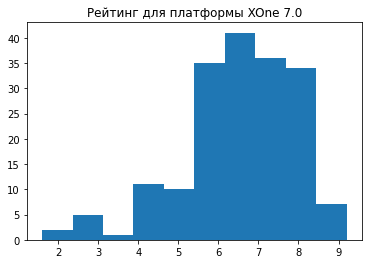

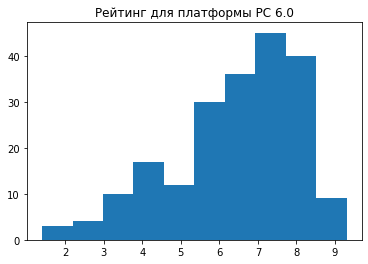

p-значение:  0.5489537965134426
Нет оснований отвергнуть нулевую гипотезу


In [106]:
checkHypothesis(raiting_x1, raiting_pc)

**Вывод**: Мы подтверждаем нашу гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"¶

### Теперь проверим вторую гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные."

Выделим массивы для жанров Action и Sports.

In [107]:
df8['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [108]:
action=df8.query('genre == "Action"')['user_score']
action.name='Рейтинг для жанра Action'

In [109]:
sports=df8.query('genre == "Sports"')['user_score']
sports.name='Рейтинг для жанра Sports'

In [110]:
(
    df8.query('genre in ("Action","Sports")')
    .groupby('genre')
    .agg(
            cnt = ('user_score', 'count'), 
            mean_score = ('user_score', 'mean'),
            var = ('user_score', 'var'),
            std = ('user_score', 'std')
    )
    .T
)

genre,Action,Sports
cnt,523.000000,195.000000
mean_score,6.825048,5.455897
var,1.889084,3.022890
std,1.374440,1.738646


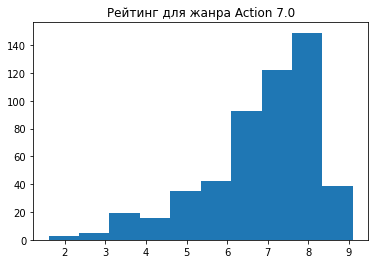

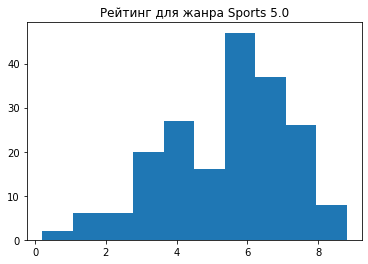

p-значение:  4.2430777657264175e-20
Отвергаем нулевую гипотезу, различия статистически значимы


In [111]:
checkHypothesis(action, sports)

Вывод: Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтверждается!

# Шаг 6. Общий вывод

- Мы выяснили, что среднее время жизни каждой платформы - примерно **8 лет**. Данные стоит брать за половину цикла **4 года**, чтобы умирающие платформы не сильно влияли на показатели. 
---

- Чтобы оценить перспективность платформы, стоит посмотреть на данные за предыдущие два-три года (последний может быть не очень информативным из-за неполноты данных) и посмотреть на кривую продаж - она должна идти в горку и быть в начале пути. Так, мы можем предположить, что в ближайшем будущем самыми перспективными платформами станут **XOne и PS4**.
---
- В регионах суммарные продажи за последние 4 года распределились по платформам в таком порядке:

- Северная Америка: X360, PS4, PS3, Xone и 3DS.

- Европа: PS4, PS3, X360, Xone, 3DS

- Япония: 3DS, PS3, PSV, PS4, WiiU

---

- Мы обнаружили взаимосвязь между продажами и оценкой критиков, **если смотреть на оценки критиков выше 80 баллов: чем больше оценка, тем выше продажи.** 
---

- Взаимосвязь между пользовательской оценкой и продажами проследить трудно, однако всё-таки наблюдается: **для оценок пользователей 9 и больше баллов продажи больше**. 
---
- **Во всем мире, кроме Японии, больше покупаются игры с рейтингов М, Mature**, т.е. игры для взрослых с достаточно высоким уровнем насилия. 
- Детские и подростковые игры с пометками Е, Е10+ и T примерно одинаково продаются в разных регионах, в Японии с небольшим отставанием. 
- **Игры с пометкой EC для совсем маленьких детей составляют очень малую часть от всех продаж.** 
---
- **Топ 5 прибыльных жанров: shooter, platfom, sports, role-playing и racing**. Наименнее прибыльные жанры: fighting, action, adventure, strategy и puzzle. 
---
- **Топ-5 жанров в регионах:**
- Северная Америка: Action, Shooter, Sports, Role-Playing и Misc

- Европа: Action, Shooter, Sports, Role-Playing и Racing

- Япония: Role-Playing, Action, Simulations, Misc, Fighting. Первые два - с больним отрывом от остальных.